<a href="https://colab.research.google.com/github/TusharSuthaar/Crop-Prediction-Model/blob/main/Crop_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset uploaded by the user
try:
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    print("---------- First 5 Rows of the Data (df.head()) ----------")
    print(df.head())
    print("\n" + "="*60 + "\n")

    print("---------- Data Types and Info (df.info()) ----------")
    df.info()
    print("\n" + "="*60 + "\n")

    print("---------- Statistical Summary (df.describe()) ----------")
    print(df.describe())
    print("\n" + "="*60 + "\n")

except FileNotFoundError:
    print("Error: 'crop-wise-area-production-yield.csv' not found.")
    print("Please ensure the CSV file is in the same directory as the script.")
except Exception as e:
    print(f"An error occurred: {e}")

---------- First 5 Rows of the Data (df.head()) ----------
   id      year      state_name  state_code  district_name  district_code  \
0   0   1998-99       Telangana          28       Adilabad            501   
1   1   1998-99       Telangana          28       Adilabad            501   
2   2   1998-99  Andhra Pradesh          28      Anantapur            502   
3   3   1998-99  Andhra Pradesh          28       Chittoor            503   
4   4   1998-99  Andhra Pradesh          28  East Godavari            505   

        season  crop_code  crop_name crop_type     area area_unit  production  \
0  Kharif             202  Arhar/Tur    Pulses  35900.0   Hectare     12700.0   
1  Rabi               202  Arhar/Tur    Pulses    100.0   Hectare       100.0   
2  Kharif             202  Arhar/Tur    Pulses  27400.0   Hectare      9100.0   
3  Kharif             202  Arhar/Tur    Pulses   6100.0   Hectare      1000.0   
4  Kharif             202  Arhar/Tur    Pulses   2100.0   Hectare       3

In [ ]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    # --- 1. Define Feature (X) and Target (y) Variables ---
    # Based on the goal, we select the input features and the output we want to predict.
    features = ['state_name', 'district_name', 'season', 'area']
    target = 'crop_name'

    X = df[features]
    y = df[target]

    print("---------- Selected Features (X) ----------")
    print(X.head())
    print("\n" + "="*60 + "\n")

    print("---------- Selected Target (y) ----------")
    print(y.head())
    print("\n" + "="*60 + "\n")

    # --- 2. Handle Missing Values ---
    print("---------- Checking for Missing Values ----------")
    missing_values = X.isnull().sum()
    print(missing_values)
    print("\n" + "="*60 + "\n")

    if missing_values.sum() == 0:
        print("Success: No missing values found in the selected feature columns.")
    else:
        # In a real scenario, we would pause here and ask the user how to handle them.
        # For this dataset, our selected columns are clean.
        print("Warning: Missing values detected. Further action would be required.")


    # --- 3. Handle Categorical Data with One-Hot Encoding ---
    print("\n---------- Handling Categorical Data ----------")
    print("Original feature data types:")
    print(X.dtypes)

    # One-Hot Encoding converts categorical columns into a numerical format.
    # For example, a 'season' column with 'Rabi' and 'Kharif' becomes two new columns:
    # 'season_Rabi' and 'season_Kharif', with 0s and 1s.
    X_processed = pd.get_dummies(X, columns=['state_name', 'district_name', 'season'], drop_first=True)

    print("\n---------- Processed Features (X_processed) ----------")
    print("Shape of the processed data:", X_processed.shape)
    print("Note the new columns created from the text features.")
    print(X_processed.head())


except FileNotFoundError:
    print("Error: 'crop-wise-area-production-yield.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

---------- Selected Features (X) ----------
       state_name  district_name       season     area
0       Telangana       Adilabad  Kharif       35900.0
1       Telangana       Adilabad  Rabi           100.0
2  Andhra Pradesh      Anantapur  Kharif       27400.0
3  Andhra Pradesh       Chittoor  Kharif        6100.0
4  Andhra Pradesh  East Godavari  Kharif        2100.0


---------- Selected Target (y) ----------
0    Arhar/Tur
1    Arhar/Tur
2    Arhar/Tur
3    Arhar/Tur
4    Arhar/Tur
Name: crop_name, dtype: object


---------- Checking for Missing Values ----------
state_name       0
district_name    0
season           0
area             0
dtype: int64


Success: No missing values found in the selected feature columns.

---------- Handling Categorical Data ----------
Original feature data types:
state_name        object
district_name     object
season            object
area             float64
dtype: object

---------- Processed Features (X_processed) ----------
Shape of the proces

In [ ]:
# STEP 3: Data Balancing or Augmentation
# ----------------------------------------
# In this step, we check if our dataset is "imbalanced" for our classification task.
# An imbalanced dataset has many examples of some classes (crops) and very few of others.
# This can create a biased model that only predicts the majority class well.
# We will analyze the distribution of our target variable, 'crop_name'.

import pandas as pd

# We need to load the dataset to access the target column.
try:
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    # Define the name of the column we want to predict.
    target_column_name = 'crop_name'

    # Isolate the target variable (y) from the dataframe.
    y = df[target_column_name]

    print("---------- Analyzing Target Variable Balance ----------\n")

    # The .value_counts() method is a powerful tool to see how many times each unique
    # value (in this case, each crop name) appears in our target column.
    crop_counts = y.value_counts()

    print(f"Total number of unique crops in the dataset: {len(crop_counts)}\n")

    # By looking at the most frequent crops, we can see which classes dominate the dataset.
    print("--- Top 10 Most Frequent Crops ---")
    print("These are the crops the model will be most familiar with.")
    print(crop_counts.head(10))
    print("\n" + "="*40 + "\n")

    # By looking at the least frequent crops, we identify the minority classes
    # that the model might struggle to learn due to lack of data.
    print("--- Top 10 Least Frequent Crops ---")
    print("These are the crops the model will have the least data for.")
    print(crop_counts.tail(10))
    print("\n" + "="*40 + "\n")

    # To quantify the imbalance, we compare the count of the most common class
    # with the count of the least common class. A large difference signals a problem.
    most_common_count = crop_counts.iloc[0]
    least_common_count = crop_counts.iloc[-1]
    most_common_name = crop_counts.index[0]
    least_common_name = crop_counts.index[-1]

    print(f"Analysis Result:")
    print(f"The most common crop ('{most_common_name}') appears {most_common_count} times.")
    print(f"The least common crop ('{least_common_name}') appears {least_common_count} time.")
    print("Conclusion: The dataset is significantly imbalanced.")


except FileNotFoundError:
    print("Error: 'crop-wise-area-production-yield.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

---------- Analyzing Target Variable Balance ----------

Total number of unique crops in the dataset: 54

--- Top 10 Most Frequent Crops ---
These are the crops the model will be most familiar with.
crop_name
Rice                 21559
Maize                20799
Moong(Green Gram)    15234
Urad                 14578
Sesamum              13046
Groundnut            12571
Wheat                11513
Rapeseed &Mustard    11030
Sugarcane            10914
Arhar/Tur            10888
Name: count, dtype: int64


--- Top 10 Least Frequent Crops ---
These are the crops the model will have the least data for.
crop_name
Safflower              1763
Cowpea(Lobia)          1761
Khesari                1759
Cashewnut              1567
Moth                   1508
Black Pepper           1405
Other Cereals          1387
Other Oilseeds         1240
Cardamom                575
Other Summer Pulses      67
Name: count, dtype: int64


Analysis Result:
The most common crop ('Rice') appears 21559 times.
The least c

In [ ]:
# STEP 4: Model Training and Evaluation
# -------------------------------------
# In this step, we will train a machine learning model to predict the best crop.
# To solve the memory crash from the previous step, we will first focus on the
# top 10 most common crops. This makes the problem more manageable.
#
# The workflow is:
# 1. Load and preprocess the data.
# 2. Filter the dataset to keep only the top 10 crops.
# 3. Split the data into training and testing sets.
# 4. Apply SMOTE to balance the *training data only*.
# 5. Train a RandomForestClassifier model.
# 6. Evaluate the model's performance on the unseen test data.

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("Starting Step 4: Model Training and Evaluation...\n")

try:
    # --- Part 1: Load and Preprocess Data ---
    print("Loading and preprocessing data...")
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    # Define features and target
    features = ['state_name', 'district_name', 'season', 'area']
    target = 'crop_name'
    X = df[features]
    y = df[target]

    # --- Part 2: Filter for Top 10 Crops ---
    # This is the key step to prevent memory crashes.
    print("Identifying and filtering for the top 10 most frequent crops...")
    top_10_crops = y.value_counts().nlargest(10).index

    # Keep only the rows in the original dataframe that belong to the top 10 crops
    df_top10 = df[df[target].isin(top_10_crops)].copy()

    # Re-define X and y with the filtered data
    X_top10 = df_top10[features]
    y_top10 = df_top10[target]

    print(f"Dataset reduced to {len(df_top10)} samples for the following crops:")
    print(top_10_crops.tolist())
    print("-" * 50)

    # Apply one-hot encoding to the filtered feature set
    X_processed = pd.get_dummies(X_top10, columns=['state_name', 'district_name', 'season'], drop_first=True)

    # --- Part 3: Split Data into Training and Testing Sets ---
    # We split the data BEFORE balancing. The test set should represent the real,
    # unbalanced world. 80% for training, 20% for testing.
    print("\nSplitting data into training and testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_top10, test_size=0.2, random_state=42, stratify=y_top10
    )
    # 'stratify=y' ensures the proportion of crops is the same in train and test sets.

    # --- Part 4: Balance the Training Data using SMOTE ---
    print("Applying SMOTE to the training data only...")
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("Original training set distribution:", Counter(y_train))
    print("Balanced training set distribution:", Counter(y_train_balanced))
    print("-" * 50)

    # --- Part 5: Train the Model ---
    # We use a RandomForestClassifier, a powerful and popular choice for this task.
    print("\nTraining the RandomForestClassifier model...")
    model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X_train_balanced, y_train_balanced)
    print("Model training complete.")
    print("-" * 50)

    # --- Part 6: Evaluate the Model ---
    # We make predictions on the original, unbalanced test set.
    print("\nEvaluating the model on the test set...")
    y_pred = model.predict(X_test)

    # Calculate and print the performance metrics.
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)

except FileNotFoundError:
    print("Error: 'crop-wise-area-production-yield.csv' not found.")
except ImportError:
    print("Error: Required libraries are not installed. Please run:")
    print("pip install pandas scikit-learn imbalanced-learn")
except Exception as e:
    print(f"An error occurred: {e}")

Starting Step 4: Model Training and Evaluation...

Loading and preprocessing data...
Identifying and filtering for the top 10 most frequent crops...
Dataset reduced to 142132 samples for the following crops:
['Rice', 'Maize', 'Moong(Green Gram)', 'Urad', 'Sesamum', 'Groundnut', 'Wheat', 'Rapeseed &Mustard', 'Sugarcane', 'Arhar/Tur']
--------------------------------------------------

Splitting data into training and testing sets...
Applying SMOTE to the training data only...
Original training set distribution: Counter({'Rice': 17247, 'Maize': 16639, 'Moong(Green Gram)': 12187, 'Urad': 11662, 'Sesamum': 10437, 'Groundnut': 10057, 'Wheat': 9210, 'Rapeseed &Mustard': 8824, 'Sugarcane': 8731, 'Arhar/Tur': 8711})
Balanced training set distribution: Counter({'Wheat': 17247, 'Groundnut': 17247, 'Sesamum': 17247, 'Urad': 17247, 'Maize': 17247, 'Moong(Green Gram)': 17247, 'Sugarcane': 17247, 'Arhar/Tur': 17247, 'Rice': 17247, 'Rapeseed &Mustard': 17247})
----------------------------------------

In [ ]:
# STEP 5 (Part 1): Save the Trained Model and Columns
# ---------------------------------------------------
# Now that we have a trained model, we need to save it for future use.
# This prevents us from having to retrain it every time we want a prediction.
# We will save two crucial components using the 'joblib' library:
# 1. The Model Object: The trained RandomForestClassifier itself.
# 2. The Model Columns: The list of all column names from our processed data.
#    This is VITAL to ensure that any new data is processed in the exact same way.

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib # The library used for saving and loading models

print("Starting Step 5: Saving the model...\n")

try:
    # --- This section repeats the training process from Step 4 ---
    # We need to have a trained 'model' object in memory to save it.

    print("Loading and preprocessing data...")
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    features = ['state_name', 'district_name', 'season', 'area']
    target = 'crop_name'

    print("Filtering for the top 10 most frequent crops...")
    top_10_crops = df[target].value_counts().nlargest(10).index
    df_top10 = df[df[target].isin(top_10_crops)].copy()

    X_top10 = df_top10[features]
    y_top10 = df_top10[target]

    X_processed = pd.get_dummies(X_top10, columns=['state_name', 'district_name', 'season'], drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_top10, test_size=0.2, random_state=42, stratify=y_top10
    )

    print("Applying SMOTE to the training data...")
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("Training the RandomForestClassifier model...")
    model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    model.fit(X_train_balanced, y_train_balanced)
    print("Model training complete.\n")

    # --- New Part: Saving the model and columns ---

    # Define the filenames for our saved files.
    model_filename = 'crop_prediction_model.pkl'
    columns_filename = 'model_columns.pkl'

    print(f"Saving model to {model_filename}...")
    # Use joblib.dump to save the trained model object.
    joblib.dump(model, model_filename)

    # Save the column names from the processed training data.
    model_columns = X_processed.columns
    print(f"Saving model columns to {columns_filename}...")
    joblib.dump(model_columns, columns_filename)

    print("\nModel and columns have been successfully saved.")
    print("You are now ready to make predictions on new data.")

except Exception as e:
    print(f"An error occurred: {e}")

Starting Step 5: Saving the model...

Loading and preprocessing data...
Filtering for the top 10 most frequent crops...
Applying SMOTE to the training data...
Training the RandomForestClassifier model...
Model training complete.

Saving model to crop_prediction_model.pkl...
Saving model columns to model_columns.pkl...

Model and columns have been successfully saved.
You are now ready to make predictions on new data.


In [ ]:
    # STEP 6: Load Model and Make Predictions
    # ----------------------------------------
    # This script demonstrates the real-world use case of the trained model.
    # It loads the previously saved model and column structure, takes new "farmer" input,
    # processes it, and predicts the most suitable crop.

    import pandas as pd
    import joblib

    def predict_crop(state, district, season, area):
        """
        Loads the saved model and predicts the best crop for the given input.

        Args:
            state (str): The name of the state.
            district (str): The name of the district.
            season (str): The planting season (e.g., 'Rabi', 'Kharif').
            area (float): The area of land in hectares.
        """
        try:
            # --- 1. Load the Saved Model and Columns ---
            model = joblib.load('crop_prediction_model.pkl')
            model_columns = joblib.load('model_columns.pkl')

            print(f"--- Predicting for: {state}, {district}, {season}, Area: {area} ---")

            # --- 2. Build the Input DataFrame from a Template ---
            input_data = pd.DataFrame(columns=model_columns)
            input_data.loc[0] = 0

            # --- 3. Populate the DataFrame with the New Data ---
            input_data.at[0, 'area'] = float(area)

            # --- FINAL FIX: Handle potential whitespace in ALL categorical columns ---
            # Search for the correct column name, accounting for trailing spaces from the original data.
            state_col, district_col, season_col = None, None, None
            for col in model_columns:
                # We use 'in col' and strip() to make the match robust against whitespace
                if col.startswith('state_name_') and state in col:
                    state_col = col
                elif col.startswith('district_name_') and district in col:
                    district_col = col
                elif col.startswith('season_') and season in col.strip():
                    season_col = col

            # Set the corresponding columns to 1 if found
            if state_col in input_data.columns:
                input_data.at[0, state_col] = 1
            if district_col in input_data.columns:
                input_data.at[0, district_col] = 1
            if season_col and season_col in input_data.columns:
                input_data.at[0, season_col] = 1

            # --- DEBUGGING SECTION ---
            print("\n--- DEBUG INFO ---")
            print(f"Shape of the final input data: {input_data.shape}")
            active_columns = input_data.columns[input_data.loc[0] != 0].tolist()
            print(f"Active (non-zero) columns being sent to the model: {active_columns}")
            print("--- END DEBUG INFO ---\n")
            # --- END DEBUGGING SECTION ---

            # --- 4. Make the Prediction ---
            prediction = model.predict(input_data)

            print(f"Model Prediction -> Recommended Crop: {prediction[0]}")
            print("-" * 50 + "\n")

        except FileNotFoundError:
            print("Error: Model files ('crop_prediction_model.pkl' or 'model_columns.pkl') not found.")
        except Exception as e:
            print(f"An error occurred: {e}")

    # --- Main execution block to test the function ---
    if __name__ == "__main__":
        print("--- Running Crop Prediction Model on Test Cases ---\n")

        # --- Test Case 1: Northern India, Winter Crop ---
        # Expected Outcome: Wheat
        predict_crop(state='Uttar Pradesh', district='Agra', season='Rabi', area=5000.0)

        # --- Test Case 2: Western India, Oilseed Crop ---
        # Expected Outcome: Rapeseed & Mustard
        predict_crop(state='Rajasthan', district='Jaipur', season='Rabi', area=12000.0)

        # --- Test Case 3: Southern India, Monsoon Crop ---
        # Expected Outcome: Maize
        predict_crop(state='Karnataka', district='Belgaum', season='Kharif', area=8000.0)



--- Running Crop Prediction Model on Test Cases ---

--- Predicting for: Uttar Pradesh, Agra, Rabi, Area: 5000.0 ---

--- DEBUG INFO ---
Shape of the final input data: (1, 735)
Active (non-zero) columns being sent to the model: ['area', 'state_name_Uttar Pradesh', 'district_name_Agra', 'season_Rabi       ']
--- END DEBUG INFO ---

Model Prediction -> Recommended Crop: Rapeseed &Mustard
--------------------------------------------------

--- Predicting for: Rajasthan, Jaipur, Rabi, Area: 12000.0 ---

--- DEBUG INFO ---
Shape of the final input data: (1, 735)
Active (non-zero) columns being sent to the model: ['area', 'state_name_Rajasthan', 'district_name_Jaipur', 'season_Rabi       ']
--- END DEBUG INFO ---

Model Prediction -> Recommended Crop: Rapeseed &Mustard
--------------------------------------------------

--- Predicting for: Karnataka, Belgaum, Kharif, Area: 8000.0 ---

--- DEBUG INFO ---
Shape of the final input data: (1, 735)
Active (non-zero) columns being sent to the model

In [ ]:
# STEP 7: Interactive User Interface for Crop Prediction
# ------------------------------------------------------
# This cell creates a user-friendly UI within Colab to interact with our saved model.
# It assumes that the previous cells, including the one that saves the model and columns,
# have been run in this session.

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import joblib
import warnings

# Suppress warnings for a cleaner UI output
warnings.filterwarnings('ignore')

# --- 1. Load Required Data and Models ---
# We need the original dataframe to populate dropdowns and find the "actual" crop.
try:
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')
    # Clean up whitespace from categorical columns in the source df for matching
    df['state_name'] = df['state_name'].str.strip()
    df['district_name'] = df['district_name'].str.strip()
    df['season'] = df['season'].str.strip()

    # Load the trained model and its columns
    model = joblib.load('crop_prediction_model.pkl')
    model_columns = joblib.load('model_columns.pkl')
    print("UI Ready: Model, columns, and source data loaded successfully.")

except FileNotFoundError:
    print("Error: Please run the previous cells to train and save the model first.")
    # Stop execution if files aren't found
    raise

# --- 2. Define the Prediction Function with Added Details ---
def predict_crop_with_details(state, district, season, area):
    """
    Predicts the crop and provides confidence score and historical context.
    """
    # --- A. Prepare Input for Model ---
    # This logic is the same robust version from our final prediction script
    input_data = pd.DataFrame(columns=model_columns)
    input_data.loc[0] = 0
    input_data.at[0, 'area'] = float(area)

    state_col, district_col, season_col = None, None, None
    for col in model_columns:
        if col.startswith('state_name_') and state in col: state_col = col
        elif col.startswith('district_name_') and district in col: district_col = col
        elif col.startswith('season_') and season in col.strip(): season_col = col

    # Set the corresponding columns to 1 if found
    if state_col in input_data.columns:
        input_data.at[0, state_col] = 1
    if district_col in input_data.columns:
        input_data.at[0, district_col] = 1
    if season_col and season_col in input_data.columns:
        input_data.at[0, season_col] = 1

    # --- DEBUGGING SECTION ---
    print("\n--- DEBUG INFO ---")
    print(f"Shape of the final input data: {input_data.shape}")
    active_columns = input_data.columns[input_data.loc[0] != 0].tolist()
    print(f"Active (non-zero) columns being sent to the model: {active_columns}")
    print("--- END DEBUG INFO ---\n")
    # --- END DEBUGGING SECTION ---

    # --- B. Get Model Prediction and Confidence Score ---
    prediction_proba = model.predict_proba(input_data)[0]
    confidence = prediction_proba.max() * 100
    predicted_crop = model.classes_[prediction_proba.argmax()]

    # --- C. Find the "Actual" Most Common Crop from Historical Data ---
    actual_data = df[
        (df['state_name'] == state) &
        (df['district_name'] == district) &
        (df['season'] == season)
    ]

    if not actual_data.empty:
        # Find the most frequent crop for that specific location/season
        actual_crop = actual_data['crop_name'].mode()[0]
    else:
        actual_crop = "No historical data for this specific combination."

    return predicted_crop, confidence, actual_crop

# --- 3. Create UI Widgets ---
# Create dropdowns with unique, sorted values from our dataframe
unique_states = sorted(df['state_name'].unique())
state_dropdown = widgets.Dropdown(options=unique_states, description='State:')

# District dropdown will be updated based on state selection
district_dropdown = widgets.Dropdown(description='District:')

unique_seasons = sorted(df['season'].unique())
season_dropdown = widgets.Dropdown(options=unique_seasons, description='Season:')

area_input = widgets.FloatText(value=1000.0, description='Area (Ha):')
predict_button = widgets.Button(description='Predict Crop', button_style='success')
output_area = widgets.Output()

# --- 4. Define UI Logic (How Widgets Interact) ---
def on_state_change(change):
    """Updates the district dropdown when a new state is selected."""
    selected_state = change['new']
    districts = sorted(df[df['state_name'] == selected_state]['district_name'].unique())
    district_dropdown.options = districts

# Link the function to the state dropdown's value
state_dropdown.observe(on_state_change, names='value')

def on_button_clicked(b):
    """Performs prediction when the button is clicked and displays output."""
    with output_area:
        clear_output() # Clear previous results
        print("Analyzing your input...")

        state = state_dropdown.value
        district = district_dropdown.value
        season = season_dropdown.value
        area = area_input.value

        # Run the prediction
        pred, conf, actual = predict_crop_with_details(state, district, season, area)

        # Display results in a clean format
        print("\n--- Prediction Results ---")
        print(f"-> Model's Recommendation: '{pred}'")
        print(f"-> Model's Confidence: {conf:.2f}%")
        print(f"-> Most Common Crop Historically: '{actual}'")
        print("------------------------")

# Link the function to the button's click event
predict_button.on_click(on_button_clicked)

# --- 5. Display the UI ---
# Manually trigger the state change once to populate the initial district list
on_state_change({'new': state_dropdown.value})

# Arrange widgets in a vertical box for a clean layout
ui = widgets.VBox([
    widgets.HTML("<h3>Enter Farming Details</h3>"),
    state_dropdown,
    district_dropdown,
    season_dropdown,
    area_input,
    predict_button,
    widgets.HTML("<hr>"),
    output_area
])

# Display the final UI
display(ui)

UI Ready: Model, columns, and source data loaded successfully.


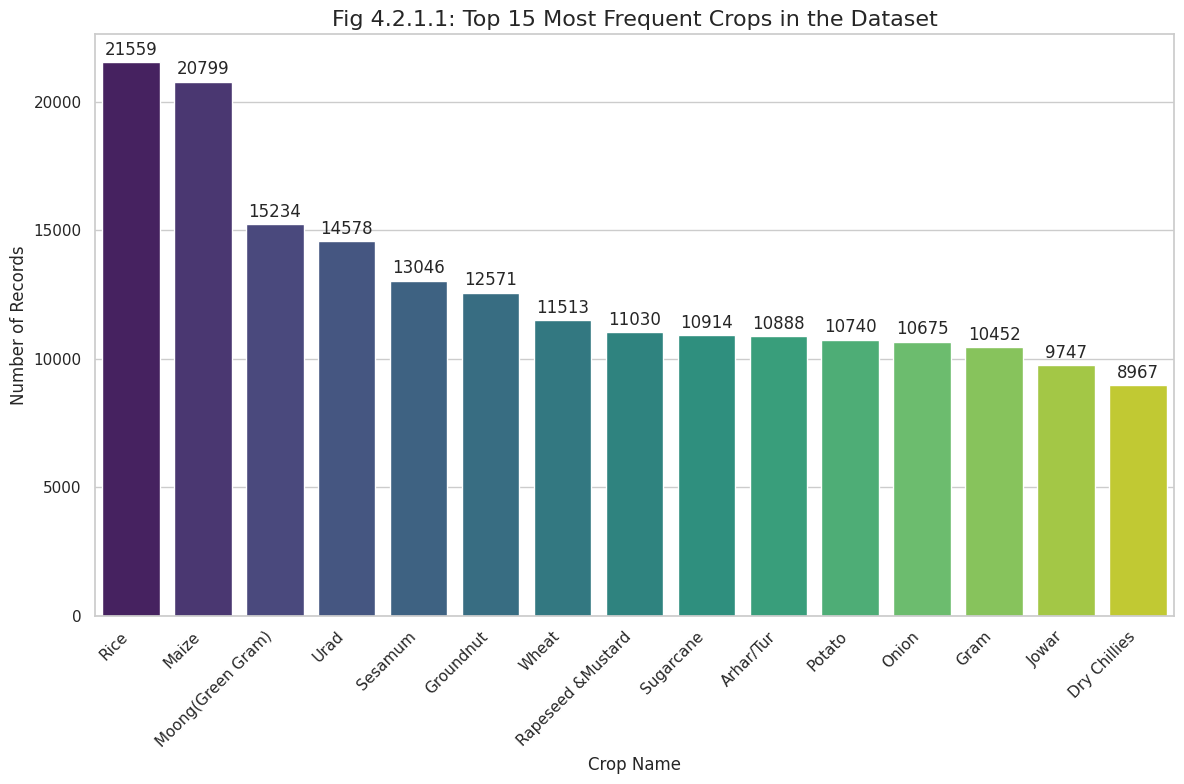

In [ ]:
# CODE TO GENERATE PLOT 4.2.1.1: CROP FREQUENCY DISTRIBUTION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('crop-wise-area-production-yield.csv', on_bad_lines='skip')

    # Set plot style
    sns.set(style="whitegrid")

    # Create the figure
    plt.figure(figsize=(12, 8))

    # Get the top 15 crop counts
    top_crops = df['crop_name'].value_counts().nlargest(15)

    # Create the bar plot
    ax = sns.barplot(x=top_crops.index, y=top_crops.values, palette='viridis')

    plt.title('Fig 4.2.1.1: Top 15 Most Frequent Crops in the Dataset', fontsize=16)
    plt.xlabel('Crop Name', fontsize=12)
    plt.ylabel('Number of Records', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Please upload the 'crop-wise-area-production-yield.csv' file to your Colab session.")

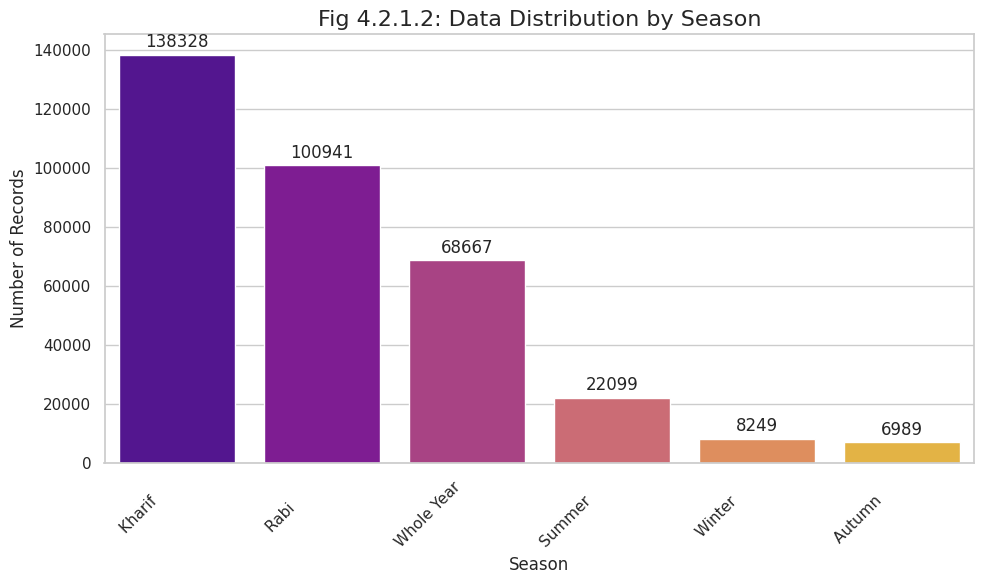

In [ ]:
# CODE TO GENERATE PLOT 4.2.1.2: DATA DISTRIBUTION BY SEASON

# Set plot style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Create the count plot for seasons
ax = sns.countplot(data=df, x='season', order=df['season'].value_counts().index, palette='plasma')

plt.title('Fig 4.2.1.2: Data Distribution by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()





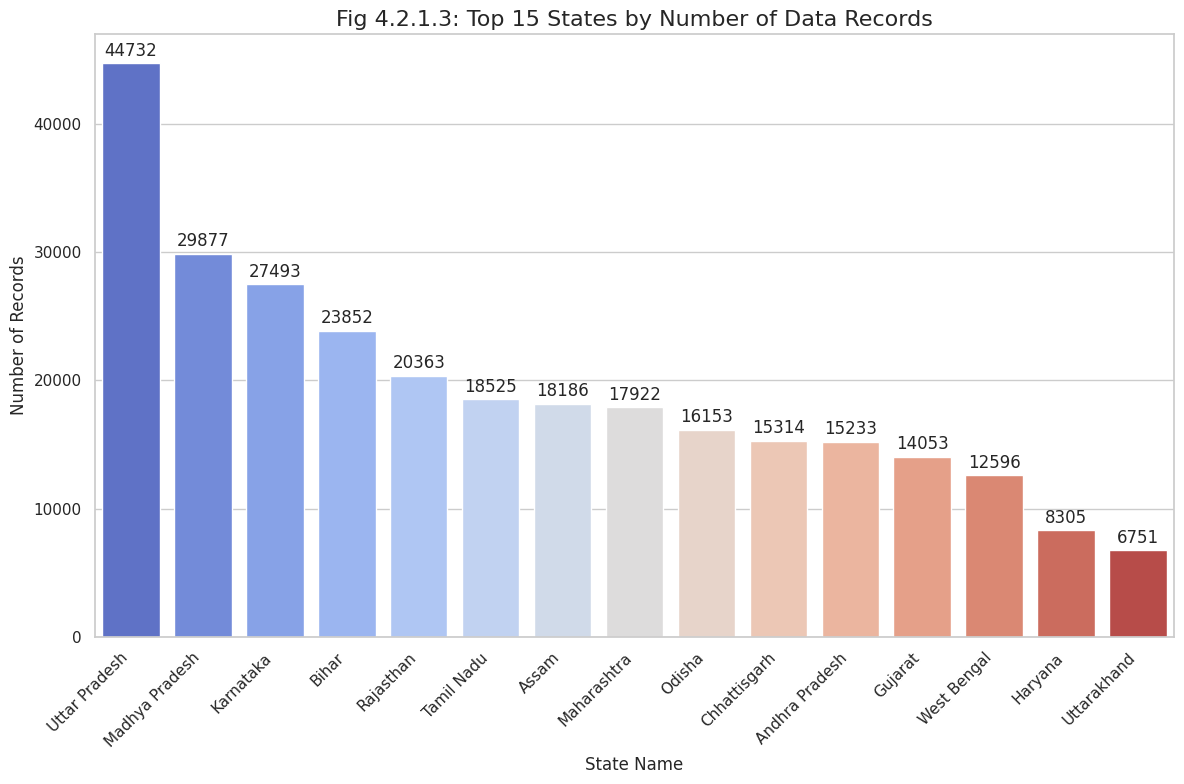

In [ ]:
# CODE TO GENERATE PLOT 4.2.1.3: TOP STATES BY DATA RECORDS

# Set plot style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Get the top 15 state counts
top_states = df['state_name'].value_counts().nlargest(15)

# Create the bar plot
ax = sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')

plt.title('Fig 4.2.1.3: Top 15 States by Number of Data Records', fontsize=16)
plt.xlabel('State Name', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()